In [1]:
import xarray as xr
import matplotlib.pyplot as plt

plt.rc("text", usetex=True)
plt.rc("font", size=12)

In [2]:
ds = xr.open_dataset("velocity_slices.nc", engine="h5netcdf")
ds

<xarray.Dataset>
Dimensions:     (t: 27, x: 1260, y: 24, z: 141)
Coordinates:
  * t           (t) float64 1.514 2.287 3.059 3.832 ... 19.28 20.06 20.83 21.6
  * x           (x) float32 0.0 0.0 0.0 0.0067156856 ... 3.1416 3.1416 3.1416
  * y           (y) float64 0.001336 0.004253 0.008236 ... 0.5959 0.7457 0.8945
  * z           (z) float32 0.0 0.0050367643 0.016033934 ... 1.5657632 1.5708
Data variables:
    x_velocity  (t, y, z, x) float32 ...
    y_velocity  (t, y, z, x) float32 ...
    z_velocity  (t, y, z, x) float32 ...

In [3]:
velocities = ds.var()

# Time averaged velocities

In [4]:
for var in velocities:
    ds[var + "_mean"] = ds.sel(t=slice(15.0, None))[var].mean('t')

In [5]:
ds.sel(t=slice(11.0, None))

<xarray.Dataset>
Dimensions:          (t: 14, x: 1260, y: 24, z: 141)
Coordinates:
  * t                (t) float64 11.56 12.33 13.1 13.88 ... 20.06 20.83 21.6
  * x                (x) float32 0.0 0.0 0.0 ... 3.1416 3.1416 3.1416
  * y                (y) float64 0.001336 0.004253 0.008236 ... 0.7457 0.8945
  * z                (z) float32 0.0 0.0050367643 ... 1.5657632 1.5708
Data variables:
    x_velocity       (t, y, z, x) float32 0.32150432 0.32150432 ... 1.1204621
    y_velocity       (t, y, z, x) float32 0.0002408628 ... -0.0049647465
    z_velocity       (t, y, z, x) float32 -0.008690938 ... 0.0042756023
    x_velocity_mean  (y, z, x) float32 0.33944675 0.33944675 ... 1.1115896
    y_velocity_mean  (y, z, x) float32 0.01096645 0.01096645 ... -0.0014064811
    z_velocity_mean  (y, z, x) float32 -0.007742087 -0.007742087 ... 0.004247131

# Fluctuation velocities

In [6]:
for var in velocities:
    ds["u" + var[0]] = ds[var + "_mean"] - ds[var]

In [7]:
ds

<xarray.Dataset>
Dimensions:          (t: 27, x: 1260, y: 24, z: 141)
Coordinates:
  * t                (t) float64 1.514 2.287 3.059 3.832 ... 20.06 20.83 21.6
  * x                (x) float32 0.0 0.0 0.0 ... 3.1416 3.1416 3.1416
  * y                (y) float64 0.001336 0.004253 0.008236 ... 0.7457 0.8945
  * z                (z) float32 0.0 0.0050367643 ... 1.5657632 1.5708
Data variables:
    x_velocity       (t, y, z, x) float32 0.29816505 0.29816505 ... 1.1204621
    y_velocity       (t, y, z, x) float32 0.0054613356 ... -0.0049647465
    z_velocity       (t, y, z, x) float32 0.010923811 ... 0.0042756023
    x_velocity_mean  (y, z, x) float32 0.33944675 0.33944675 ... 1.1115896
    y_velocity_mean  (y, z, x) float32 0.01096645 0.01096645 ... -0.0014064811
    z_velocity_mean  (y, z, x) float32 -0.007742087 -0.007742087 ... 0.004247131
    ux               (y, z, x, t) float32 0.0412817 0.054543465 ... -0.008872509
    uy               (y, z, x, t) float32 0.0055051143 ... 0.0035582655
    uz               (y, z, x, t) float32 -0.018665899 ... -2.8471462e-05

# Friction velocity

Computed as a function of time

![](http://glossary.ametsoc.org/w/images/7/75/Ams2001glos-Fe18.gif)

or using the current variable names $u_* = [\langle{u'v'}\rangle^2 + \langle{w'v'}\rangle^2]^{1/4}$

In [8]:
ds_w = ds.sel(y=ds.y.min())
avg_coords = ('x', 'z')

uv = (ds_w.ux * ds_w.uy).mean(avg_coords)
wv = (ds_w.uz * ds_w.uy).mean(avg_coords)

urms = urms1 = (ds.ux**2 + ds.uy**2 + ds.uz**2).mean(('x', 'y', 'z'))**(1/2)

ustar = ustar1 = (uv**2 + wv**2)**(1/4)

Text(0.5, 1.0, 'Spatially averaged RMS velocity')

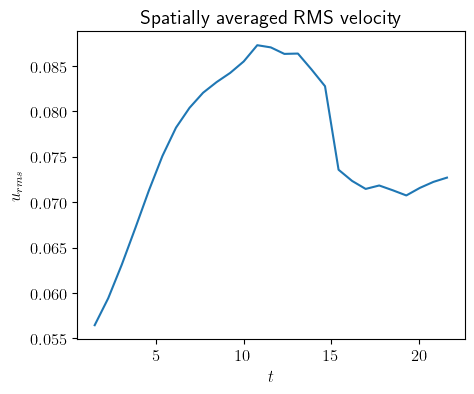

In [9]:
plt.figure(figsize=(5, 4))
(urms).plot()
plt.ylabel("$u_{rms}$")
plt.xlabel("$t$")
plt.title("Spatially averaged RMS velocity")

# Momentum flux

At the end of the simulation

$\langle u'v' \rangle / u_{rms}$

In [10]:
ds_end = ds.sel(t=ds.t.max())
ds_end

<xarray.Dataset>
Dimensions:          (x: 1260, y: 24, z: 141)
Coordinates:
    t                float64 21.6
  * x                (x) float32 0.0 0.0 0.0 ... 3.1416 3.1416 3.1416
  * y                (y) float64 0.001336 0.004253 0.008236 ... 0.7457 0.8945
  * z                (z) float32 0.0 0.0050367643 ... 1.5657632 1.5708
Data variables:
    x_velocity       (y, z, x) float32 0.23779467 0.23779467 ... 1.1204621
    y_velocity       (y, z, x) float32 0.0940954 0.0940954 ... -0.0049647465
    z_velocity       (y, z, x) float32 -0.03701887 -0.03701887 ... 0.0042756023
    x_velocity_mean  (y, z, x) float32 0.33944675 0.33944675 ... 1.1115896
    y_velocity_mean  (y, z, x) float32 0.01096645 0.01096645 ... -0.0014064811
    z_velocity_mean  (y, z, x) float32 -0.007742087 -0.007742087 ... 0.004247131
    ux               (y, z, x) float32 0.101652086 0.101652086 ... -0.008872509
    uy               (y, z, x) float32 -0.08312895 -0.08312895 ... 0.0035582655
    uz               (y, z, x) float32 0.029276783 ... -2.8471462e-05

Text(0.5, 1.0, 'Horizontally averaged momentum flux at $t=21.6$')

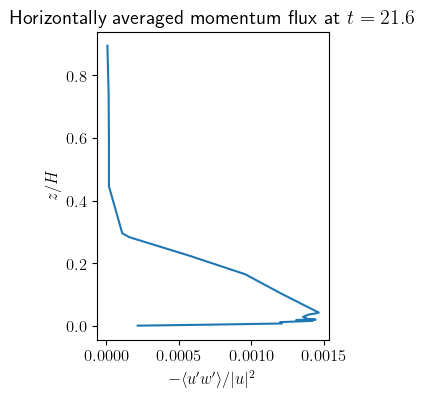

In [17]:
avg_coords = ('x', 'z')

# mom_flux = (ds_end.ux * ds_end.uy + ds_end.uz * ds_end.uy).mean(avg_coords)
mom_flux = (ds_end.ux * ds_end.uy).mean(avg_coords)
ux2 = (ds_end.ux ** 2).mean(avg_coords)
urms = urms2 = (ds_end.ux**2 + ds_end.uy**2 + ds_end.uz**2).mean(avg_coords)**(1/2)

ubulk = ds_end.x_velocity.mean()

ds_w = ds_end.sel(y=ds.y.min())
uv = (ds_w.ux * ds_w.uy).mean(avg_coords)
wv = (ds_w.uz * ds_w.uy).mean(avg_coords)

ustar = ustar2 = (uv**2 + wv**2)**(1/4)

plt.figure(figsize=(3, 4))
# (- mom_flux / ustar**2).plot.line(y="y", yscale="log", label=r"$- \langle u'v'\rangle / u_{*}^2$")
# (ux2 / ustar**2).plot.line(y="y", yscale="log", label=r"$- \langle u'^2\rangle / u_{*}^2$")
(- mom_flux / ubulk**2).plot(y="y")

# plt.xlabel(r"$- \langle u'v' + w'v' \rangle / u_{*}^2$")
# plt.xlabel(r"$- \langle u'w'\rangle / u_{*}^2$")
plt.xlabel(r"$- \langle u'w'\rangle / |u|^2$")

plt.ylabel("$z/H$")
plt.title("Horizontally averaged momentum flux at $t=21.6$")
# plt.legend()

# Combined plot

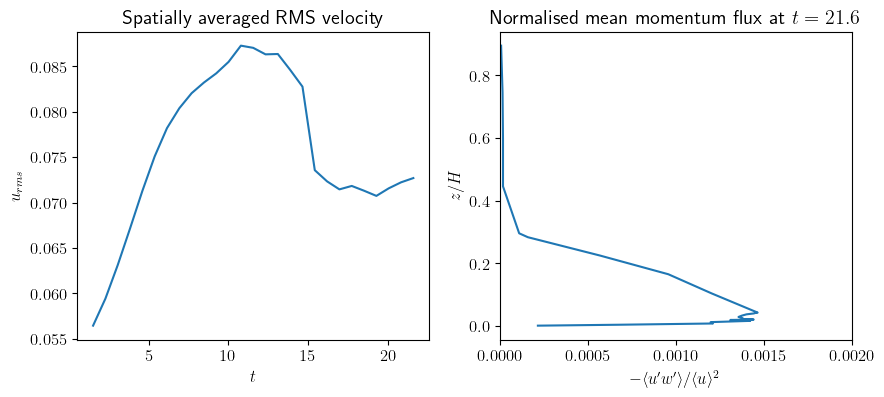

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes.ravel()

(urms1).plot(ax=ax1)
ax1.set_ylabel("$u_{rms}$")
ax1.set_xlabel("$t$")
ax1.set_title("Spatially averaged RMS velocity")

(- mom_flux / ubulk**2).plot.line(ax=ax2, y="y", label=r"$- \langle u'v'\rangle / u_{*}^2$")

# plt.xlabel(r"$- \langle u'v' + w'v' \rangle / u_{*}^2$")
plt.xlabel(r"$- \langle u'w'\rangle / \langle u \rangle^2$")
plt.ylabel("$z/H$")
plt.xlim(0, 0.002)
plt.title("Normalised mean momentum flux at $t=21.6$")
# plt.legend()

plt.savefig("stats.eps")

# Averaged velocity profile

In [101]:
avg_coords = ('x', 'z')

ux_mean = ds_end.x_velocity.mean(avg_coords)


Text(0, 0.5, '$z/H$')

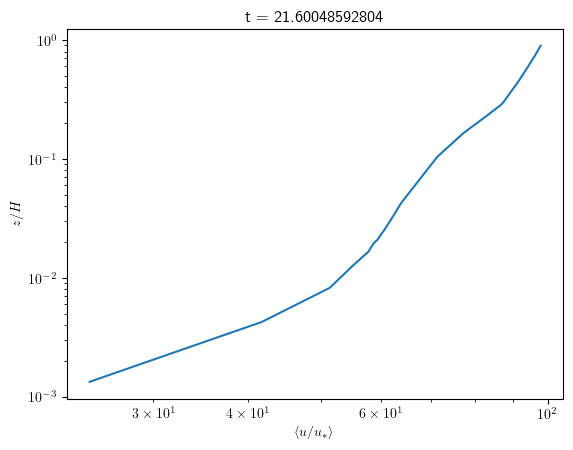

In [131]:
(ux_mean / ustar).plot(y="y", xscale="log", yscale="log")
plt.xlabel(r"$\langle u / u_* \rangle$")
plt.ylabel("$z/H$")

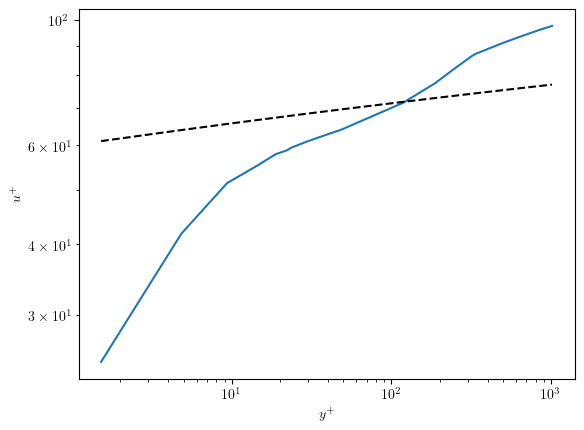

In [140]:
nu = 1e-5
yplus = ds.y * ustar / nu
plt.loglog(yplus, (ux_mean / ustar))
plt.ylabel(r"$u^+$")
plt.xlabel("$y^+$")

kappa = 0.41
c = 60
plt.loglog(yplus, np.log(yplus) / kappa + c, 'k--')